In [32]:
import numpy
import numpy as np
import scipy

from pandas import DataFrame

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [35]:
%matplotlib inline

<h2>1) Скачаем датасет</h2>

In [23]:
! wget http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip
! unzip smsspamcollection.zip


--2016-12-18 17:24:04--  http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip
Resolving www.dt.fee.unicamp.br (www.dt.fee.unicamp.br)... 143.106.12.20
Connecting to www.dt.fee.unicamp.br (www.dt.fee.unicamp.br)|143.106.12.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210521 (206K) [application/zip]
Saving to: ‘smsspamcollection.zip.3’

smsspamcollection.z 100%[===================>] 205.59K  74.8KB/s    in 2.7s    

2016-12-18 17:24:08 (74.8 KB/s) - ‘smsspamcollection.zip.3’ saved [210521/210521]

Archive:  smsspamcollection.zip
replace readme? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


<h2>2,3) Считаем данные и подготовим списки признаков</h2>

In [22]:
src = open('SMSSpamCollection.txt')
items = [line.strip('\n').split('\t')[::-1] for line in src.readlines()]
texts = [it[0] for it in items]
labels = [it[1] for it in items]
for i, label in enumerate(labels):
    labels[i] = 1 if label == 'spam' else 0

<h2>4) получим признаки bag of words</h2>

In [13]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(texts)

<h2>5) Подготовим score_function</h2>

In [11]:
def score_func(est, X, y):
    cv = cross_val_score(est, X, y, cv=10, scoring='f1')
    print(cv)
    return cv.mean()

<h2>проверим на LogisticRegression</h2>

In [14]:
print(score_func(LogisticRegression(), features, labels))

[ 0.96598639  0.89855072  0.91549296  0.95833333  0.93706294  0.91304348
  0.94444444  0.92753623  0.92198582  0.95104895]
0.933348526858


<h2>Ответ в п.5 0.933348526858</h2>

<h2>6) Отклассифицируем данные сообщения классификатором, обученным на всей выборке</h2>

In [16]:
x = ["FreeMsg: Txt: CALL to No:86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GB",
     "FreeMsg: Txt: claim your reward of 3 hours talk time",
     "Have you visited the last lecture on physics?", 
     "Have you visited the last lecture on physics? Just buy this book and you will have all materials! Only 99$", 
     "Only 99$"]

In [18]:
new_labels = LogisticRegression().fit(features, labels).predict(vectorizer.transform(x))
print(new_labels)

[1 1 0 0 0]


<h2>Ответ на п.6: "1 1 0 0 0"</h2>

<h2>7) Попробуем разные ngram_range</h2>

In [19]:
ngram_ranges = [ (2, 2), (3, 3), (1, 3)]

In [21]:
for ngram_range in ngram_ranges:
    print(score_func(LogisticRegression(),
                     CountVectorizer(ngram_range=ngram_range).fit_transform(texts),
                     labels
                     ))

[ 0.828125    0.8125      0.8372093   0.8372093   0.85496183  0.828125
  0.7704918   0.78688525  0.816       0.85271318]
0.822422066419
[ 0.75        0.71794872  0.71794872  0.75        0.72881356  0.71794872
  0.69565217  0.71304348  0.71304348  0.74576271]
0.725016155547
[ 0.95104895  0.88888889  0.92857143  0.92857143  0.93617021  0.92086331
  0.92086331  0.91176471  0.91428571  0.95035461]
0.925138255865


<h2>Ответ в п.7: "0.82 0.73 0.93"</h2>

<h2>8) То же самое для MultinomialNB()</h2>

In [25]:
for ngram_range in ngram_ranges:
    print(score_func(MultinomialNB(),
                     CountVectorizer(ngram_range=ngram_range).fit_transform(texts),
                     labels
                     ))

[ 0.68202765  0.64628821  0.63559322  0.62978723  0.66055046  0.65437788
  0.63478261  0.61206897  0.62931034  0.66976744]
0.645455401356
[ 0.39361702  0.37659033  0.390625    0.3649635   0.39130435  0.37922078
  0.37279597  0.36868687  0.37279597  0.37563452]
0.378623430876
[ 0.93081761  0.9068323   0.8969697   0.88622754  0.85714286  0.87116564
  0.87116564  0.88343558  0.86390533  0.91139241]
0.887905460889


<h2>Ответ в п.8: "0.65 0.39 0.89"</h2>

<h2> 9) Попробуем TfidfVectorizer + LogisticRegression</h2>

In [29]:
for ngram_range in ngram_ranges:
    print(score_func(LogisticRegression(),
                     TfidfVectorizer(ngram_range=ngram_range).fit_transform(texts),
                     labels
                     ))

[ 0.33333333  0.31460674  0.40425532  0.35164835  0.31460674  0.27586207
  0.31460674  0.39130435  0.33707865  0.40860215]
0.344590444786
[ 0.17073171  0.17073171  0.25581395  0.23529412  0.14814815  0.07692308
  0.14814815  0.15        0.15        0.15      ]
0.165579085899
[ 0.69565217  0.66071429  0.62385321  0.66071429  0.64864865  0.70689655
  0.52941176  0.61682243  0.61682243  0.72413793]
0.648367371228


<h2> :( Из-за маленькой тренировочной выборки, многие стоп-слова получают большой вес</h2>

<h2> 10) Попробуем улучшить score </h2>

<h3> Для начала попробуем понизить размерность <h3>

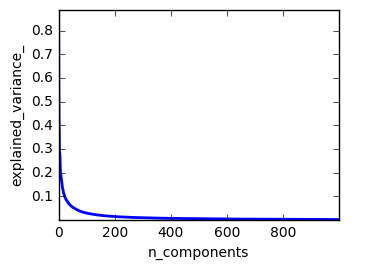

In [62]:
svd = TruncatedSVD(1000)
svd.fit(features)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(svd.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [63]:
N_COMP = 500

In [74]:
svd = TruncatedSVD(N_COMP)
logistic = LogisticRegression(n_jobs=-1, class_weight='balanced')

In [ ]:
pipe = Pipeline(steps=[('svd', svd), ('logistic', logistic)])
Cs = np.logspace(-2, 2, 20)
estimator = GridSearchCV(pipe, dict(logistic__C=Cs), n_jobs=-1, scoring=score_func)


In [ ]:
estimator.fit(features, labels)

In [87]:
b_est = estimator.best_estimator_
b_params = estimator.best_params_
b_score = estimator.best_score_

In [91]:
print(estimator.param_grid)

{'logistic__C': array([  1.00000000e-02,   1.62377674e-02,   2.63665090e-02,
         4.28133240e-02,   6.95192796e-02,   1.12883789e-01,
         1.83298071e-01,   2.97635144e-01,   4.83293024e-01,
         7.84759970e-01,   1.27427499e+00,   2.06913808e+00,
         3.35981829e+00,   5.45559478e+00,   8.85866790e+00,
         1.43844989e+01,   2.33572147e+01,   3.79269019e+01,
         6.15848211e+01,   1.00000000e+02])}


In [145]:
score_func(b_est, features, labels)

[ 0.92207792  0.92517007  0.90196078  0.97986577  0.90540541  0.93617021
  0.94039735  0.94520548  0.92810458  0.93877551]


0.93231330802152146

<h3> А теперь сравним с тем же, но без понижения размерности </h3>

In [92]:
logistic = LogisticRegression(n_jobs=-1, class_weight='balanced')
estimator_2 = GridSearchCV(logistic, dict(C=Cs), n_jobs=-1, scoring=score_func)
estimator_2.fit(features, labels)

[ 0.83636364  0.92592593  0.79310345  0.83636364  0.89795918  0.86792453
  0.96153846  0.83636364  0.8         0.83636364][ 0.90566038  0.87272727  0.78571429  0.85185185  0.88461538  0.81632653
  0.84615385  0.88461538  0.84        0.86792453]

[ 0.85185185  0.88        0.86792453  0.84        0.88461538  0.86792453
  0.85185185  0.89285714  0.98039216  0.83333333]
[ 0.94117647  0.92307692  0.81481481  0.86792453  0.90196078  0.83333333
  0.84615385  0.88461538  0.84        0.88461538]
[ 0.86792453  0.89795918  0.86792453  0.85714286  0.8627451   0.88461538
  0.88        0.90566038  0.98039216  0.88888889]
[ 0.86792453  0.92592593  0.83636364  0.8627451   0.89795918  0.92
  0.98039216  0.83636364  0.81632653  0.83636364]
[ 0.96        0.94117647  0.83018868  0.86792453  0.90196078  0.85106383
  0.84615385  0.88461538  0.84        0.90196078]
[ 0.90196078  0.875       0.90196078  0.875       0.84        0.90196078
  0.88        0.90566038  0.98039216  0.86363636]
[ 0.85185185  0.961538

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-02,   1.62378e-02,   2.63665e-02,   4.28133e-02,
         6.95193e-02,   1.12884e-01,   1.83298e-01,   2.97635e-01,
         4.83293e-01,   7.84760e-01,   1.27427e+00,   2.06914e+00,
         3.35982e+00,   5.45559e+00,   8.85867e+00,   1.43845e+01,
         2.33572e+01,   3.79269e+01,   6.15848e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=<function score_func at 0x7fe57c3c0950>, verbose=0)

In [95]:
b_est2 = estimator_2.best_estimator_
b_params2 = estimator_2.best_params_
b_score2 = estimator_2.best_score_
print(b_params2, b_score2)

{'C': 8.8586679041008232} 0.9211919622426195


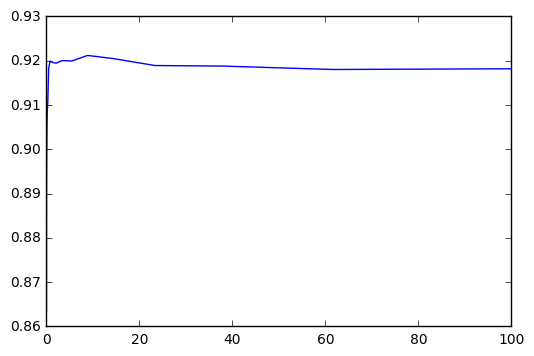

In [111]:
plt.plot(Cs, [x[1] for x in estimator_2.grid_scores_])

In [120]:
Cs = np.linspace(5, 10, 100)
logistic = LogisticRegression(n_jobs=-1, class_weight='balanced')
estimator_2 = GridSearchCV(logistic, dict(C=Cs), n_jobs=-1, scoring=score_func)
estimator_2.fit(features, labels)

[ 0.95833333  0.97959184  0.90196078  0.93617021  0.93877551  0.88888889
  0.91304348  0.93877551  0.91304348  0.93877551][ 0.89361702  0.86956522  0.95833333  0.86363636  0.875       0.85714286
  0.89361702  0.90196078  0.97959184  0.93333333]

[ 0.93877551  0.97959184  0.96        0.93617021  0.93617021  0.93617021
  0.96        0.81632653  0.88888889  0.91304348][ 0.89361702  0.86956522  0.95833333  0.86363636  0.875       0.85714286
  0.89361702  0.90196078  0.97959184  0.93333333]

[ 0.95833333  0.97959184  0.90196078  0.93617021  0.93877551  0.88888889
  0.91304348  0.93877551  0.91304348  0.93877551]
[ 0.89361702  0.86956522  0.95833333  0.86363636  0.875       0.85714286
  0.89361702  0.90196078  0.97959184  0.93333333]
[ 0.93877551  0.97959184  0.96        0.93617021  0.93617021  0.93617021
  0.96        0.81632653  0.88888889  0.91304348]
[ 0.93877551  0.97959184  0.96        0.93617021  0.93617021  0.93617021
  0.96        0.81632653  0.88888889  0.91304348][ 0.93877551  0.9

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  5.     ,   5.05051, ...,   9.94949,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=<function score_func at 0x7fe57c3c0950>, verbose=0)

In [121]:
b_est2 = estimator_2.best_estimator_
b_params2 = estimator_2.best_params_
b_score2 = estimator_2.best_score_
print(b_params2, b_score2)

{'C': 7.4747474747474749} 0.9211919622426195


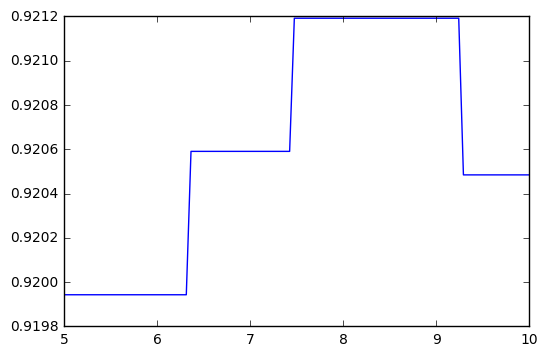

In [122]:
plt.plot(Cs, [x[1] for x in estimator_2.grid_scores_])

In [132]:
features_mixed_case = CountVectorizer(lowercase=False).fit_transform(texts)

In [141]:
Cs = np.linspace(0.1, 10, 100)
logistic = LogisticRegression(n_jobs=-1, class_weight='balanced')
estimator_2 = GridSearchCV(logistic, dict(C=Cs), n_jobs=-1, scoring=score_func)
estimator_2.fit(features, labels)

[ 0.97959184  0.96        0.84615385  0.90196078  0.89795918  0.86956522
  0.85714286  0.90196078  0.875       0.92      ]
[ 0.93877551  0.875       0.93877551  0.86956522  0.85106383  0.90196078
  0.88        0.88461538  0.98039216  0.90909091]
[ 0.88461538  1.          0.90196078  0.88        0.89361702  0.91666667
  0.96        0.84        0.88888889  0.8627451 ]
[ 0.93877551  0.875       0.95833333  0.89361702  0.875       0.90196078
  0.88        0.88461538  0.98039216  0.90909091]
[ 0.95833333  0.96        0.90196078  0.90196078  0.91666667  0.88888889
  0.85714286  0.92        0.91304348  0.93877551]
[ 0.88461538  1.          0.90196078  0.88        0.89361702  0.91666667
  0.96        0.84        0.88888889  0.85714286][ 0.93877551  0.875       0.95833333  0.89361702  0.875       0.88        0.88
  0.88461538  0.98039216  0.90909091]

[ 0.88461538  1.          0.94117647  0.89795918  0.89361702  0.91666667
  0.96        0.81632653  0.88888889  0.875     ][ 0.88461538  1.       

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  0.1,   0.2, ...,   9.9,  10. ])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=<function score_func at 0x7fe57c3c0950>, verbose=0)

In [142]:
b_est2 = estimator_2.best_estimator_
b_params2 = estimator_2.best_params_
b_score2 = estimator_2.best_score_
print(b_params2, b_score2)

{'C': 7.5} 0.9211919622426195


In [143]:
score_func(b_est2, features, labels)

[ 0.97333333  0.92198582  0.95238095  0.96551724  0.93055556  0.92857143
  0.95238095  0.95833333  0.95945946  0.95172414]


0.94942422099281953

In [146]:
score_func(LogisticRegression(), features_mixed_case, labels)

[ 0.95833333  0.91304348  0.9         0.93617021  0.92307692  0.91304348
  0.92957746  0.91970803  0.92198582  0.95035461]


0.92652933452156816

<h3><p>Применение других классификаторов вместо логистической регрессии повысить скор не помогло</p>
<p>В среднем, линейные классификаторы дали скор ~90%</p><h3>

<h2> 11) Выводы:</h2>
<h4><p> 1. Tfidf нужна большая выборка для обучения, на малой мусорные слова могут приобретать большой вес. </p>
<p> 2. Соответственно TfidfVectorizer не всегда лучше, чем CountVectorizer </p>
<p> 3. Иногда можно уменьшать размерность используя max_features у vectorizer'a вместо PCA, SVD, особо не теряя в качестве, но значительно выигрывая в скорости </p>
<p> 3. Байесовским методам нужна значительно бОльшая выборка, чем в этом случае. </p>
<p> 4. При малых размерах выборки опираться на коллокации неэффективныо</p>
<p> 5. Используя одинаковое решение можно получить разные результаты на кросс-валидации </p>
</h4>